<a href="https://colab.research.google.com/github/ywq0321/BIO/blob/main/Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Stock Price Predictor Using Python
In this tutorial, we are going to build an AI neural network model to predict stock prices. Specifically, we will work with the Tesla stock, hoping that we can make Elon Musk happy along the way. If you are a beginner, it would be wise to check out [this](https://www.section.io/engineering-education/introduction-to-neural-networks/) article about neural networks.

We are going to use numpy for scientific operations, pandas to modify our dataset, matplotlib to visualize the results, sklearn to scale our data, and keras to work as a wrapper on low-level libraries like TensorFlow or Theano high-level neural networks library.

# What is a RNN?
When you read this text, you understand each word based on previous words in your brain. You wouldn’t start thinking from scratch, rather your thoughts are cumulative. Recurrent Neural Networks implement the same concept using machines; they have loops and allow information to persist where traditional neural networks can’t.

# What is LSTM?
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture that you can use in the deep learning field. In LSTM, you can process an entire sequence of data. For example, handwriting generation, question answering or speech recognition, and much more.

Unlike the traditional feed-forward neural network, that passes the values sequentially through each layer of the network, LSTM has a feedback connection that helps it remember preceding information, making it the perfect model for our needs to do time series analysis.

# Choosing data
In this tutorial, I will use a TESLA stock dataset from Yahoo finance, that contains stock data for ten years. You can download it for free from [here](https://github.com/ahmadmardeni1/Stock-price-predection-using-Python).

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Let’s upload our dataset

In [ ]:
from google.colab import files
dataset = files.upload()

Saving TSLA.csv to TSLA.csv


Then press “choose files” and upload the dataset.

After uploading our data, we need to make a data frame:



In [ ]:
df=pd.read_csv('TSLA.csv')

After that, let’s get the number of trading days:

In [ ]:
df.shape

(2392, 7)

The result will be (2392, 7).

To make it as simple as possible we will just use one variable which is the “open” price.

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

The reshape allows you to add dimensions or change the number of elements in each dimension. We are using reshape(-1, 1) because we have just one dimension in our array, so numby will create the same number of our rows and add one more axis: 1 to be the second dimension.

Now let’s split the data into training and testing sets:

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

We will use the MinMaxScaler to scale our data between zero and one. In simpler words, the scaling is converting the numerical data represented in a wide range into a smaller one.

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

Next, we will create the function that will help us to create the datasets:



In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

For the features (x), we will always append the last 50 prices, and for the label (y), we will append the next price. Then we will use numpy to convert it into an array.

Now we are going to create our training and testing data by calling our function for each one:

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Next, we need to reshape our data to make it a 3D array in order to use it in LSTM Layer.

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Model building

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

First, we initialized our model as a sequential one with 96 units in the output’s dimensionality. We used return_sequences=True to make the LSTM layer with three-dimensional input and input_shape to shape our dataset.

Making the dropout fraction 0.2 drops 20% of the layers. Finally, we added a dense layer with a value of 1 because we want to output one value.

After that, we want to reshape our feature for the LSTM layer, because it is sequential_3 which is expecting 3 dimensions, not 2:

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Now we want to compile our model:

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')


We used loss='mean_squared_error' because it is a regression problem, and the adam optimizer to update network weights iteratively based on training data.

We are ready!

Let’s save our model and start the training:

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/10
59/59 [==============================] - 15s 148ms/step - loss: 0.0154
Epoch 2/10
59/59 [==============================] - 9s 147ms/step - loss: 0.0038
Epoch 3/10
59/59 [==============================] - 10s 170ms/step - loss: 0.0038
Epoch 4/10
59/59 [==============================] - 9s 148ms/step - loss: 0.0038
Epoch 5/10
59/59 [==============================] - 9s 150ms/step - loss: 0.0028
Epoch 6/10
59/59 [==============================] - 9s 146ms/step - loss: 0.0030
Epoch 7/10
59/59 [==============================] - 9s 147ms/step - loss: 0.0028
Epoch 8/10
59/59 [==============================] - 9s 161ms/step - loss: 0.0023
Epoch 9/10
59/59 [==============================] - 9s 146ms/step - loss: 0.0024
Epoch 10/10
59/59 [==============================] - 9s 147ms/step - loss: 0.0027


Every epoch refers to one cycle through the full training dataset, and batch size refers to the number of training examples utilized in one iteration.

Let’s load our model:

In [ ]:
model = load_model('stock_prediction.h5')

# Results visualization
The last step is to visualize our data. If you are new to data visualization please consider going through the [Getting Started with Data Visualization](https://www.section.io/engineering-education/stock-price-prediction-using-python/engineering-education/getting-started-with-data-visualization-using-pandas/) using Pandas tutorial first

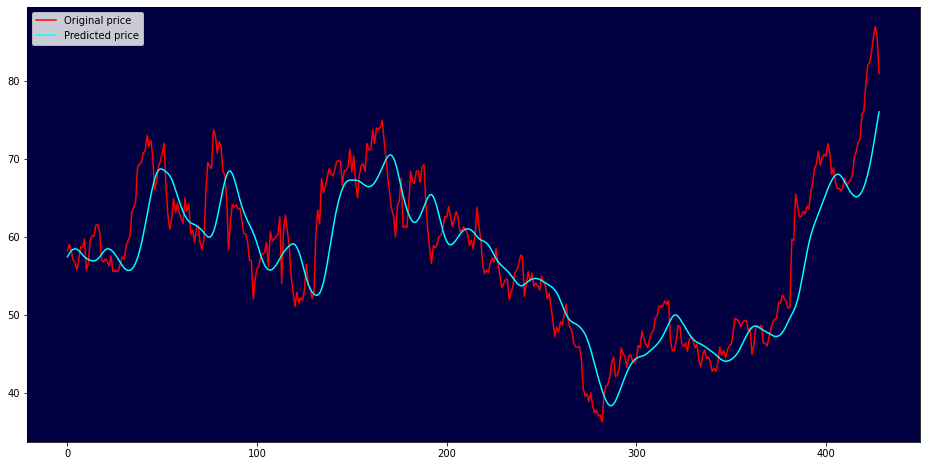

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()

# Wrapping up
We got a very good prediction result! Imagine if you are working with multiple variables, how much more accurate the result could be?

I also recommend you to change layers, numbers, epochs, and batch_size. Try it out for yourself and change whatever you think may improve your prediction and more accurate.